#1 随机数据的线性回归

Weight coefficients: [ 0.90603945]
y-axis intercept: 0.355755062345


Score: 0.900780139721


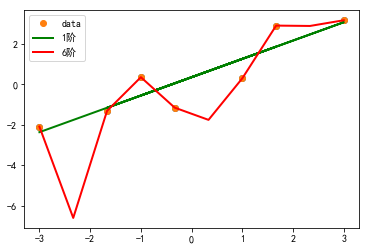

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

N = 10
N1 = 6
x = np.linspace(-3, 3, N)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('Weight coefficients:', regressor.coef_) # 最小二乘法的系数\n",
print('y-axis intercept:', regressor.intercept_) # 最小二乘法的截距\n",

plt.plot(X_train, y_train, 'o')

y_pred_train = regressor.predict(X_train)
print('Score:', regressor.score(X_test, y_test))

model = Pipeline([('poly', PolynomialFeatures(degree=N1)),
                  ('linear', LinearRegression(fit_intercept=False))])
# model.set_params(poly__degree=N1)
model.fit(X_train, y_train)
x_hat = np.linspace(X_train.min(), X_train.max(), num=N)
x_hat.shape = -1, 1
y_hat = model.predict(x_hat)

plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'g-', linewidth=2, label="1阶")
plt.plot(x_hat, y_hat, 'r-', linewidth=2, label=u"%d阶" % N1)

# plt.plot(x_hat, y_hat, color=clrs[i], lw=line_width[i], alpha=0.75, label=label, zorder=z)

plt.legend(loc='best')
plt.show()

#2 广告数据的线性回归

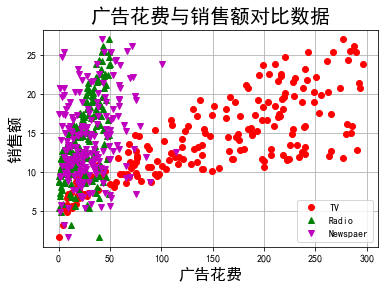

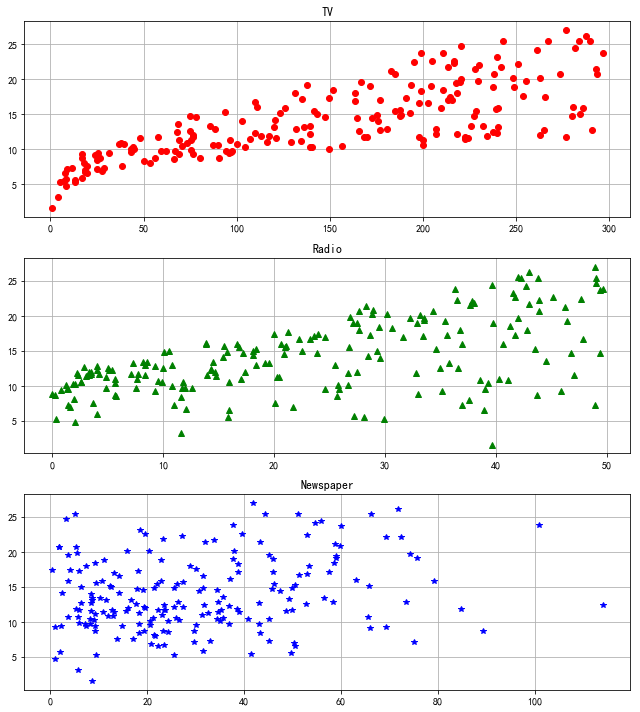

<class 'pandas.core.frame.DataFrame'>
(160, 2) (160,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 0.04686997  0.1800065 ] 2.94751503603
MSE =  1.95522188501
RMSE =  1.39829248908
R2 =  0.895852846878
R2 =  0.894734495003


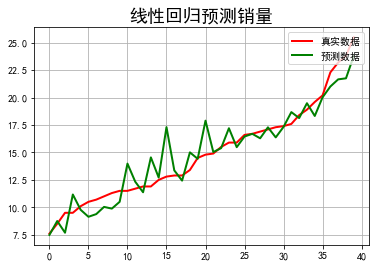

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# pandas读入
data = pd.read_csv('data/Advertising.csv')
x = data[['TV', 'Radio']]
y = data['Sales']

mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

# 绘制1
plt.figure(facecolor='w')
plt.plot(data['TV'], y, 'ro', label='TV')
plt.plot(data['Radio'], y, 'g^', label='Radio')
plt.plot(data['Newspaper'], y, 'mv', label='Newspaer')
plt.legend(loc='lower right')
plt.xlabel(u'广告花费', fontsize=16)
plt.ylabel(u'销售额', fontsize=16)
plt.title(u'广告花费与销售额对比数据', fontsize=20)
plt.grid()
plt.show()

# 绘制2
plt.figure(facecolor='w', figsize=(9, 10))
plt.subplot(311)
plt.plot(data['TV'], y, 'ro')
plt.title('TV')
plt.grid()
plt.subplot(312)
plt.plot(data['Radio'], y, 'g^')
plt.title('Radio')
plt.grid()
plt.subplot(313)
plt.plot(data['Newspaper'], y, 'b*')
plt.title('Newspaper')
plt.grid()
plt.tight_layout()
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
print(type(x_test))
print(x_train.shape, y_train.shape)
linreg = LinearRegression()
model = linreg.fit(x_train, y_train)
print(model)
print(linreg.coef_, linreg.intercept_)

order = y_test.argsort(axis=0)
y_test = y_test.values[order]
x_test = x_test.values[order, :]
y_hat = linreg.predict(x_test)
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error 均方误差
rmse = np.sqrt(mse)  # Root Mean Squared Error
print('MSE = ', mse)
print('RMSE = ', rmse)
print('R2 = ', linreg.score(x_train, y_train))
print('R2 = ', linreg.score(x_test, y_test))

plt.figure(facecolor='w')
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label=u'真实数据')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测数据')
plt.legend(loc='upper right')
plt.title(u'线性回归预测销量', fontsize=18)
plt.grid(b=True)
plt.show()

#3 随机数的曲线拟合

线性回归：1阶，系数为： [-17.94304379   5.05371849]
线性回归：2阶，系数为： [-3.14388347 -3.54979913  0.94754615]
线性回归：3阶，系数为： [-3.57719562 -3.15294927  0.85040656  0.006954  ]
线性回归：4阶，系数为： [-11.58222507   6.55529959  -2.91398085   0.58480922  -0.03054395]
线性回归：5阶，系数为： [  6.11423176 -19.86310607  11.13681344  -2.81679674   0.35115846  -0.01610732]
线性回归：6阶，系数为： [ 23.92448598 -52.99214597  34.71977215 -11.08374605   1.86925152  -0.15586218   0.00508212]
线性回归：7阶，系数为： [  71.32164192 -159.56538369  130.39737219  -55.60333199   13.52903752   -1.88584218    0.14056893   -0.0043452 ]
线性回归：8阶，系数为： [-1031.73114931  2588.14406093 -2682.38161642  1493.96975117  -491.59016709    98.44730395   -11.78185582     0.77415796    -0.0214725 ]


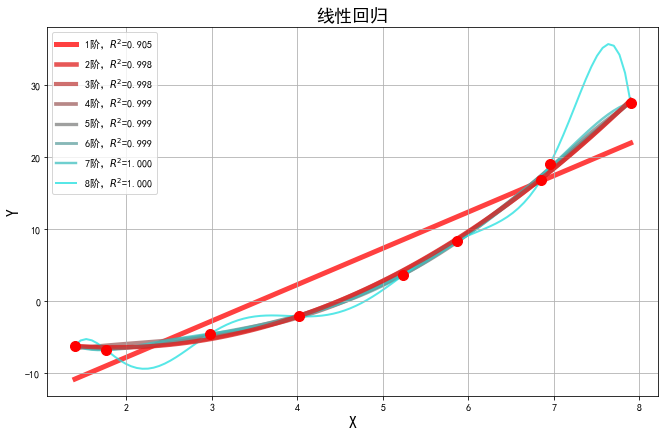

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.exceptions import ConvergenceWarning
import matplotlib as mpl
import warnings

def xss(y, y_hat):
    y = y.ravel()
    y_hat = y_hat.ravel()
    # Version 1
    tss = ((y - np.average(y)) ** 2).sum()
    rss = ((y_hat - y) ** 2).sum()
    ess = ((y_hat - np.average(y)) ** 2).sum()
    r2 = 1 - rss / tss
    # print 'RSS:', rss, '\t ESS:', ess
    # print 'TSS:', tss, 'RSS + ESS = ', rss + ess
    tss_list.append(tss)
    rss_list.append(rss)
    ess_list.append(ess)
    ess_rss_list.append(rss + ess)
    # Version 2
    # tss = np.var(y)
    # rss = np.average((y_hat - y) ** 2)
    # r2 = 1 - rss / tss
    corr_coef = np.corrcoef(y, y_hat)[0, 1]
    return r2, corr_coef

warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
np.random.seed(0)
np.set_printoptions(linewidth=1000)
N = 9
x = np.linspace(0, 8, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)
x.shape = -1, 1
y.shape = -1, 1

model = Pipeline([('poly', PolynomialFeatures()),
                  ('linear', LinearRegression(fit_intercept=False))])
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress=True)

plt.figure(figsize=(18, 12), facecolor='w')
d_pool = np.arange(1, N, 1)  # 阶
m = d_pool.size
clrs = []  # 颜色
for c in np.linspace(16711680, 255, N):
    clrs.append("#{:06X}".format(int(c), 2))
line_width = np.linspace(5, 2, m)
titles = u'线性回归'
tss_list = []
rss_list = []
ess_list = []
ess_rss_list = []
plt.subplot(2, 2, 1)
plt.plot(x, y, 'ro', ms=10, zorder=N)
for i, d in enumerate(d_pool):
    model.set_params(poly__degree=d)
    model.fit(x, y.ravel())
    lin = model.get_params('linear')['linear']
    output = u'%s：%d阶，系数为：' % (titles, d)
    if hasattr(lin, 'alpha_'):
        idx = output.find(u'系数')
        output = output[:idx] + (u'alpha=%.6f，' % lin.alpha_) + output[idx:]
    if hasattr(lin, 'l1_ratio_'):   # 根据交叉验证结果，从输入l1_ratio(list)中选择的最优l1_ratio_(float)
        idx = output.find(u'系数')
        output = output[:idx] + (u'l1_ratio=%.6f，' % lin.l1_ratio_) + output[idx:]
    print(output, lin.coef_.ravel())
    x_hat = np.linspace(x.min(), x.max(), num=100)
    x_hat.shape = -1, 1
    y_hat = model.predict(x_hat)
    s = model.score(x, y)
    r2, corr_coef = xss(y, model.predict(x))
    # print 'R2和相关系数：', r2, corr_coef
    # print 'R2：', s, '\n'
    z = N - 1 if (d == 2) else 0
    label = u'%d阶，$R^2$=%.3f' % (d, s)
    if hasattr(lin, 'l1_ratio_'):
        label += u'，L1 ratio=%.2f' % lin.l1_ratio_
    plt.plot(x_hat, y_hat, color=clrs[i], lw=line_width[i], alpha=0.75, label=label, zorder=z)
plt.legend(loc='upper left')
plt.grid(True)
plt.title(titles, fontsize=18)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
    
plt.tight_layout(1, rect=(0, 0, 1, 0.95))
plt.show()